# **Load and understand the dataset**

In [76]:
import pandas as pd

df = pd.read_csv('mobile_addiction.csv')
df.head()
#df.info()

,Unnamed: 0,daily_screen_time,app_sessions,notifications_number,night_usage,age,productivity_hours,stress_level,apps_installed,addicted
0,0,6.561167,29,49,0.248357,44,5.102429,32.450712,35,not addicted
1,1,9.442024,29,65,0.930868,29,4.539708,62.926035,21,addicted
2,2,10.556476,28,56,3.323844,28,7.758144,74.715328,39,addicted
3,3,11.797676,39,67,1.761515,28,5.214882,87.845448,24,addicted
4,4,9.306057,37,60,1.882923,27,4.616142,61.487699,26,addicted


# **Data Preprocessing**

In [77]:
#drop the first column (index colummn)
df.drop(columns=['Unnamed: 0'], inplace=True)
#df.head()
#df.info()

#fixing float data to 2 decimal places
df['daily_screen_time'] = df['daily_screen_time'].round(2)
df['stress_level'] = df['stress_level'].round(2)
df['night_usage'] = df['night_usage'].round(2)
df['productivity_hours'] = df['productivity_hours'].round(2)
#print(df.head())

#Getting Target Variables Ready
df.rename(columns={'addicted': 'addiction_status'}, inplace=True)
df.rename(columns={'stress_level': 'stress_risk'}, inplace=True)
df['stress_risk'] = df['stress_risk'].apply(lambda x: 'yes' if x >= 60 else 'no')
#print(df.head())

#Convert Target Variables from String to Binary Integers
df['addiction_status'] = df['addiction_status'].map({'addicted': 1, 'not addicted': 0})
df['stress_risk'] = df['stress_risk'].map({'yes': 1, 'no': 0})
df.head()

#Check for missing values in the dataset
#df.isnull().sum()


,daily_screen_time,app_sessions,notifications_number,night_usage,age,productivity_hours,stress_risk,apps_installed,addiction_status
0,6.56,29,49,0.25,44,5.10,0,35,0
1,9.44,29,65,0.93,29,4.54,1,21,1
2,10.56,28,56,3.32,28,7.76,1,39,1
3,11.80,39,67,1.76,28,5.21,1,24,1
4,9.31,37,60,1.88,27,4.62,1,26,1


# **Evaluating Features**

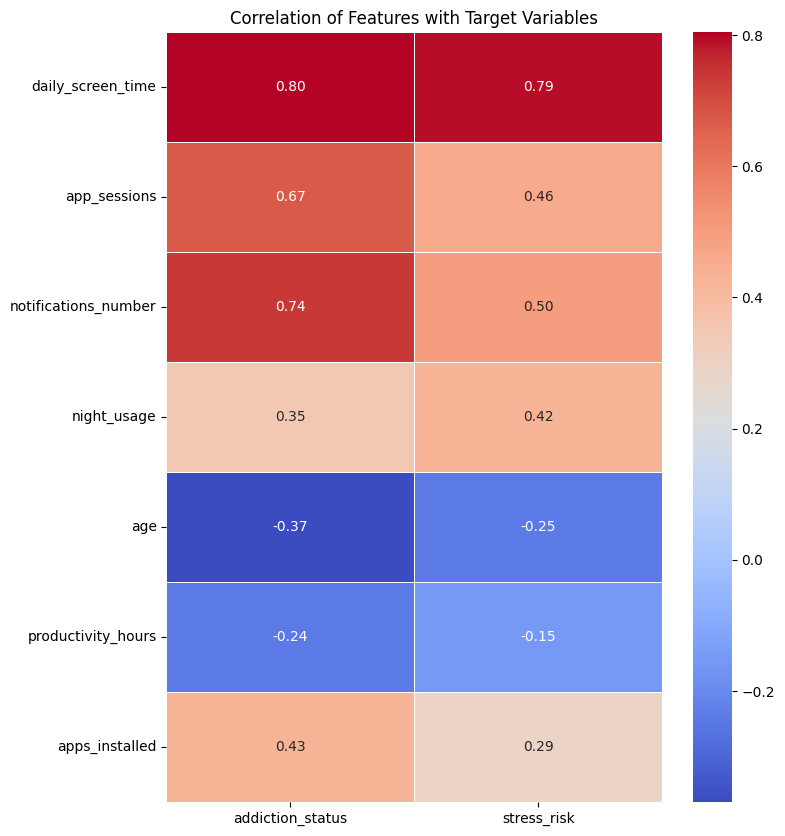

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Create a heat map of correlations between all features and the target variables
corr_matrix = df.corr()
corr_targets = corr_matrix[['addiction_status', 'stress_risk']].drop(['addiction_status', 'stress_risk'])
plt.figure(figsize=(8, 10))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with Target Variables')
plt.show()

#This helped in evaluating which features to include in training the model and which features to drop

# **Visualize Relations between target variables and important features**

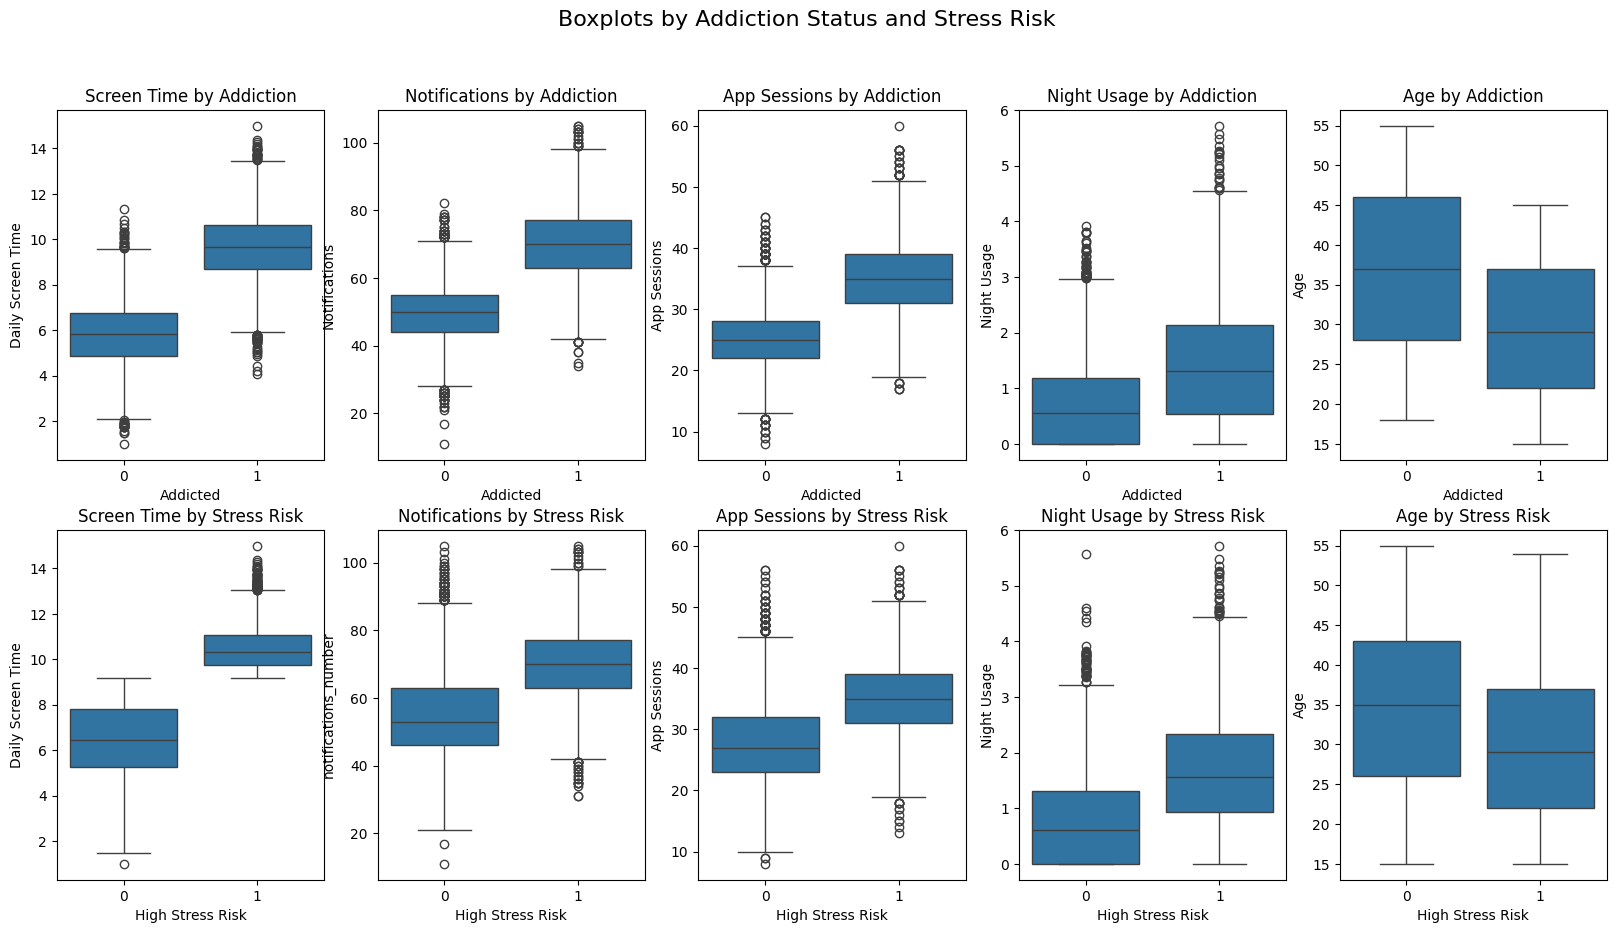

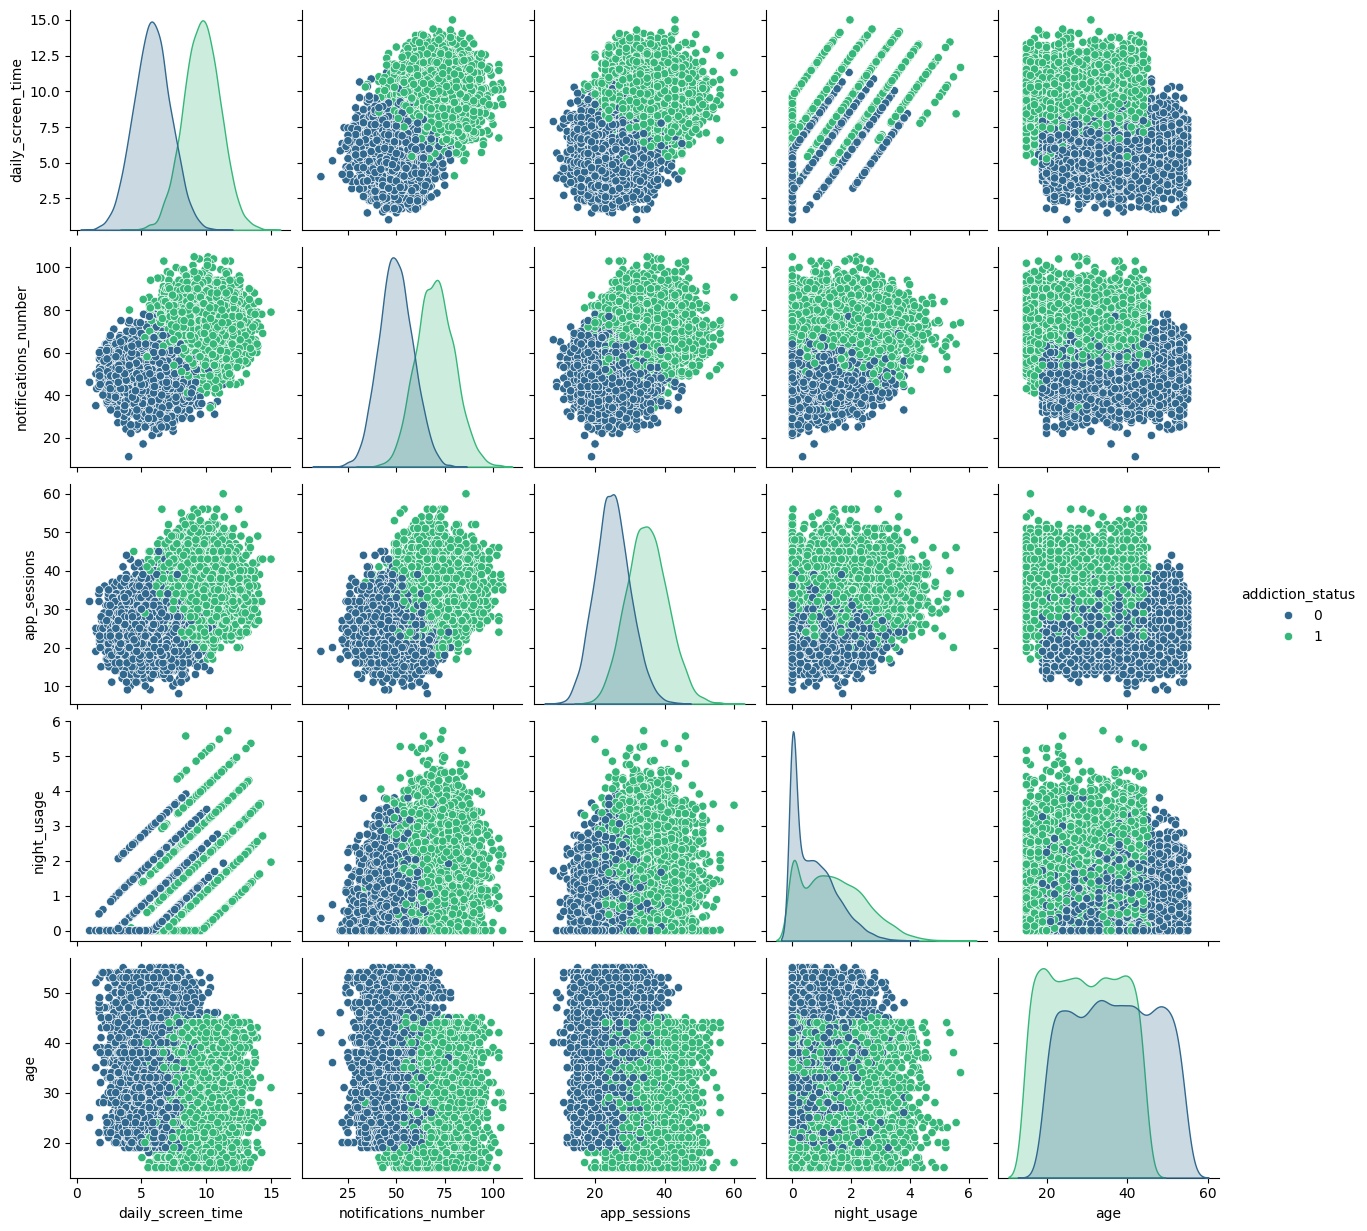

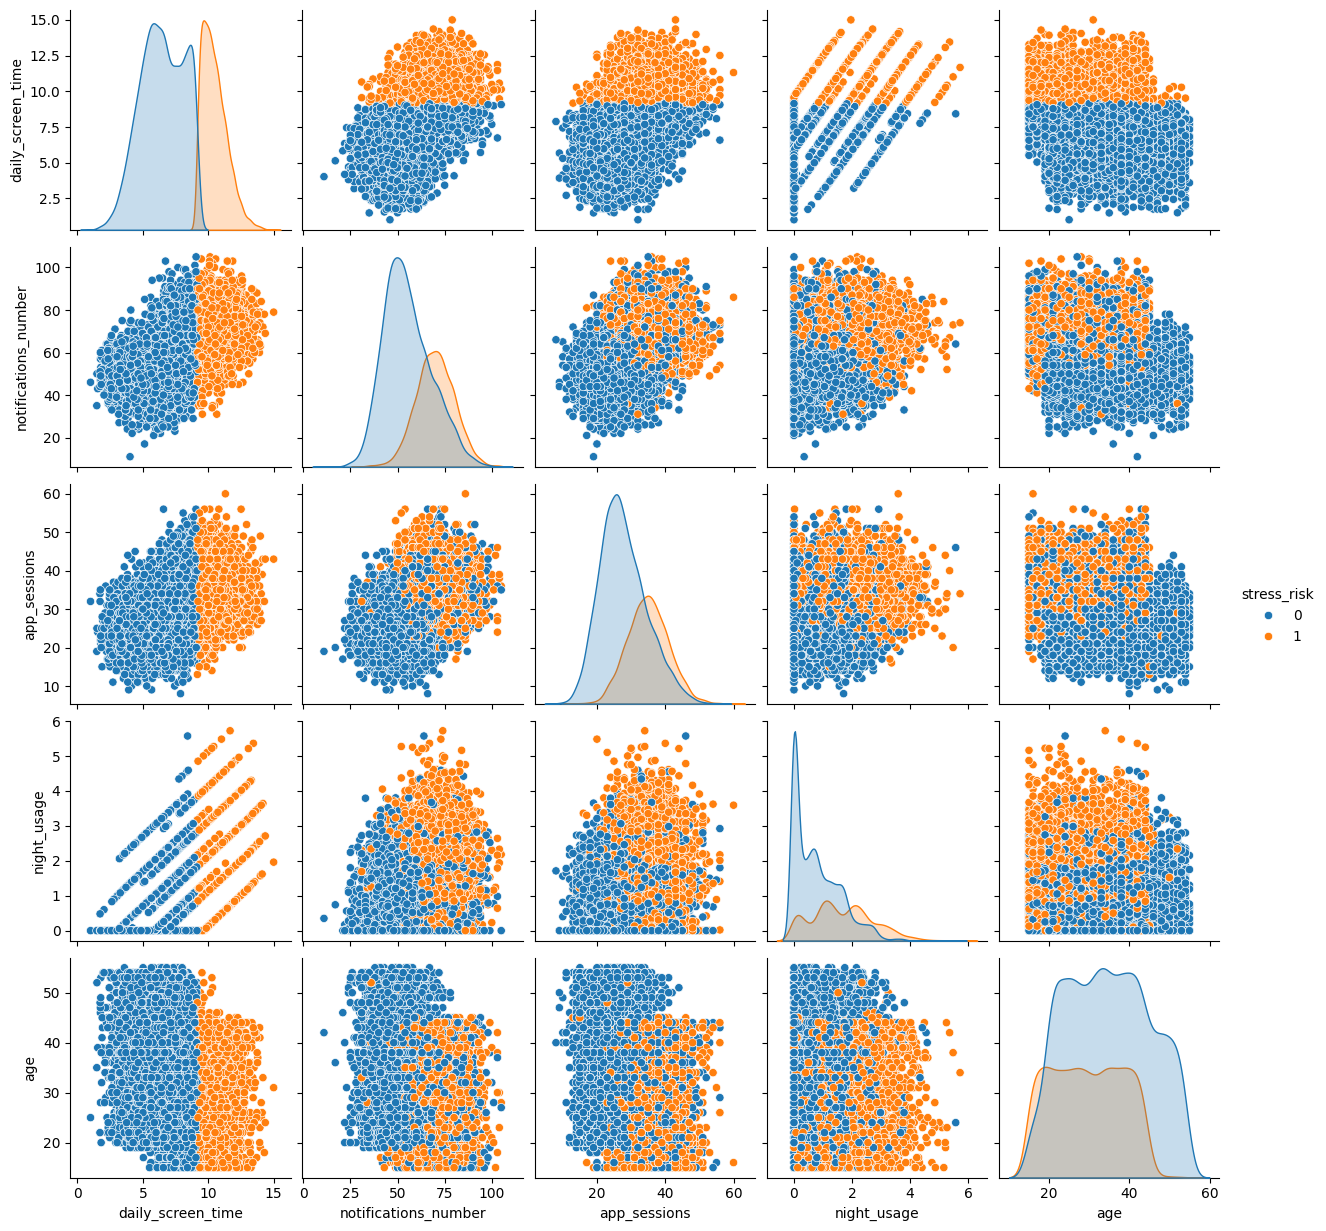

In [79]:
#BoxPlots
# Set up a subplot grid to display all plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle("Boxplots by Addiction Status and Stress Risk", fontsize=16)

# Row 1: addiction_status
# vs Daily Screen Time
sns.boxplot(ax=axes[0, 0], x='addiction_status', y='daily_screen_time', data=df)
axes[0, 0].set_title("Screen Time by Addiction")
axes[0, 0].set_xlabel("Addicted")
axes[0, 0].set_ylabel("Daily Screen Time")

# vs Notifications
sns.boxplot(ax=axes[0, 1], x='addiction_status', y='notifications_number', data=df)
axes[0, 1].set_title("Notifications by Addiction")
axes[0, 1].set_xlabel("Addicted")
axes[0, 1].set_ylabel("Notifications")

# vs App Sessions
sns.boxplot(ax=axes[0, 2], x='addiction_status', y='app_sessions', data=df)
axes[0, 2].set_title("App Sessions by Addiction")
axes[0, 2].set_xlabel("Addicted")
axes[0, 2].set_ylabel("App Sessions")

# vs Night Usage
sns.boxplot(ax=axes[0, 3], x='addiction_status', y='night_usage', data=df)
axes[0, 3].set_title("Night Usage by Addiction")
axes[0, 3].set_xlabel("Addicted")
axes[0, 3].set_ylabel("Night Usage")

# vs Age
sns.boxplot(ax=axes[0, 4], x='addiction_status', y='age', data=df)
axes[0, 4].set_title("Age by Addiction")
axes[0, 4].set_xlabel("Addicted")
axes[0, 4].set_ylabel("Age")


# Row 2: stress_risk
# vs Daily Screen Time
sns.boxplot(ax=axes[1, 0], x='stress_risk', y='daily_screen_time', data=df)
axes[1, 0].set_title("Screen Time by Stress Risk")
axes[1, 0].set_xlabel("High Stress Risk")
axes[1, 0].set_ylabel("Daily Screen Time")

# vs Notifications
sns.boxplot(ax=axes[1, 1], x='stress_risk', y='notifications_number', data=df)
axes[1, 1].set_title("Notifications by Stress Risk")
axes[1, 1].set_xlabel("High Stress Risk")
axes[1, 2].set_ylabel("Notifications")

# vs App Sessions
sns.boxplot(ax=axes[1, 2], x='stress_risk', y='app_sessions', data=df)
axes[1, 2].set_title("App Sessions by Stress Risk")
axes[1, 2].set_xlabel("High Stress Risk")
axes[1, 2].set_ylabel("App Sessions")

# vs Night Usage
sns.boxplot(ax=axes[1, 3], x='stress_risk', y='night_usage', data=df)
axes[1, 3].set_title("Night Usage by Stress Risk")
axes[1, 3].set_xlabel("High Stress Risk")
axes[1, 3].set_ylabel("Night Usage")

# vs Age
sns.boxplot(ax=axes[1, 4], x='stress_risk', y='age', data=df)
axes[1, 4].set_title("Age by Stress Risk")
axes[1, 4].set_xlabel("High Stress Risk")
axes[1, 4].set_ylabel("Age")



plt.show()

sns.pairplot(df,
             vars=['daily_screen_time', 'notifications_number', 'app_sessions', 'night_usage', 'age'],
             hue='addiction_status',
             palette='viridis')
plt.show()

sns.pairplot(df,
             vars=['daily_screen_time', 'notifications_number', 'app_sessions', 'night_usage', 'age'],
             hue='stress_risk')
plt.show()


# **Scaling and splitting the data**

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling the features
scaler = StandardScaler()

features = ['daily_screen_time', 'notifications_number', 'app_sessions', 'night_usage', 'age']

x = df[features]
y1 = df['addiction_status']
y2 = df['stress_risk']

x_scaled = scaler.fit_transform(x)

print(x.shape, y1.shape)
print(x.shape, y2.shape)

#splitting the data
x_train, x_test, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.2, random_state=42)
x_train, x_test, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=42)


(13589, 5) (13589,)
(13589, 5) (13589,)


# **Train the Logistic Regression Model to Classify if the user is Addicted or Not Addicted**

In [81]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model for Addiction Status
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y1_train)

y1_pred = logreg_model.predict(x_test)

# **Evaluate the model**

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("\nEvaluation for Logistic Regression Model:\n")
cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual: Not Addicted', 'Actual: Addicted'],
    columns=['Predicted: Not Addicted', 'Predicted: Addicted']
)
print("Confusion Matrix:")
print('----------------------------------------------------------------')
print(cm_df)
print('----------------------------------------------------------------\n')
print("Accuracy:\t", accuracy_score(y1_test, y1_pred))
print("Precision:\t", precision_score(y1_test, y1_pred))
print("Recall:\t\t", recall_score(y1_test, y1_pred))
print("F1 Score:\t", f1_score(y1_test, y1_pred))




Evaluation for Logistic Regression Model:

Confusion Matrix:
----------------------------------------------------------------
                      Predicted: Not Addicted  Predicted: Addicted
Actual: Not Addicted                     1306                   30
Actual: Addicted                           24                 1358
----------------------------------------------------------------

Accuracy:	 0.9801324503311258
Precision:	 0.978386167146974
Recall:		 0.9826338639652678
F1 Score:	 0.9805054151624548


# **Visualize using ROC Curve**

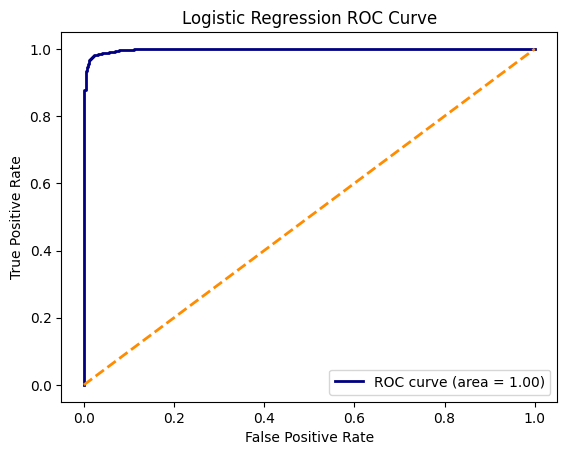

In [83]:
##plot the ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = logreg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Train the KNN Model to Classify if the user is at high stress risks or low stress risks**

In [84]:
##train the KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y2_train)

y2_pred = knn_model.predict(x_test)

# **Evaluate the Model**

In [85]:
cm = confusion_matrix(y2_test, y2_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual: Low Risk', 'Actual: High Risk'],
    columns=['Predicted: Low Risk', 'Predicted: High Risk']
)
print("Confusion Matrix:")
print('----------------------------------------------------------------')
print(cm_df)
print('----------------------------------------------------------------\n')
print("Accuracy:\t", accuracy_score(y2_test, y2_pred))
print("Precision:\t", precision_score(y2_test, y2_pred))
print("Recall:\t\t", recall_score(y2_test, y2_pred))
print("F1 Score:\t", f1_score(y2_test, y2_pred))

Confusion Matrix:
----------------------------------------------------------------
                   Predicted: Low Risk  Predicted: High Risk
Actual: Low Risk                  1785                    52
Actual: High Risk                   28                   853
----------------------------------------------------------------

Accuracy:	 0.9705665930831494
Precision:	 0.9425414364640884
Recall:		 0.9682179341657208
F1 Score:	 0.9552071668533034


# **Visualize using ROC Curve**

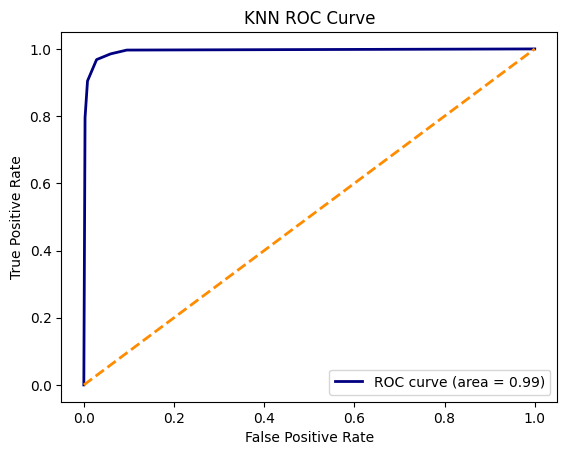

In [86]:
y2_score = knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y2_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
import joblib

joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')

from google.colab import files
files.download('logreg_model.pkl')
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>